# Principal Component Analysis

### Import all the necessary libraries and cancer data.

### Import the data to a dataframe and view 10 rows

In [1]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

In [2]:
import pandas as pd
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer = cancer.drop(columns=['ID', 'Class'], axis=1)

### Describe the dataset

In [3]:
cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary

#### Hint: Look for "?" in the data and replace with mode

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [5]:
cancer['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
cancer['Bare Nuclei'].replace('?', cancer['Bare Nuclei'].mode()[0], inplace=True)
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype(int)

### Check for correlation and plot pairplots

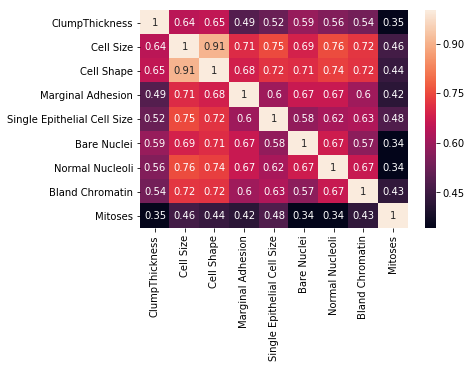

In [7]:
import seaborn as sns
%matplotlib inline
sns.heatmap( cancer.corr(), annot=True)

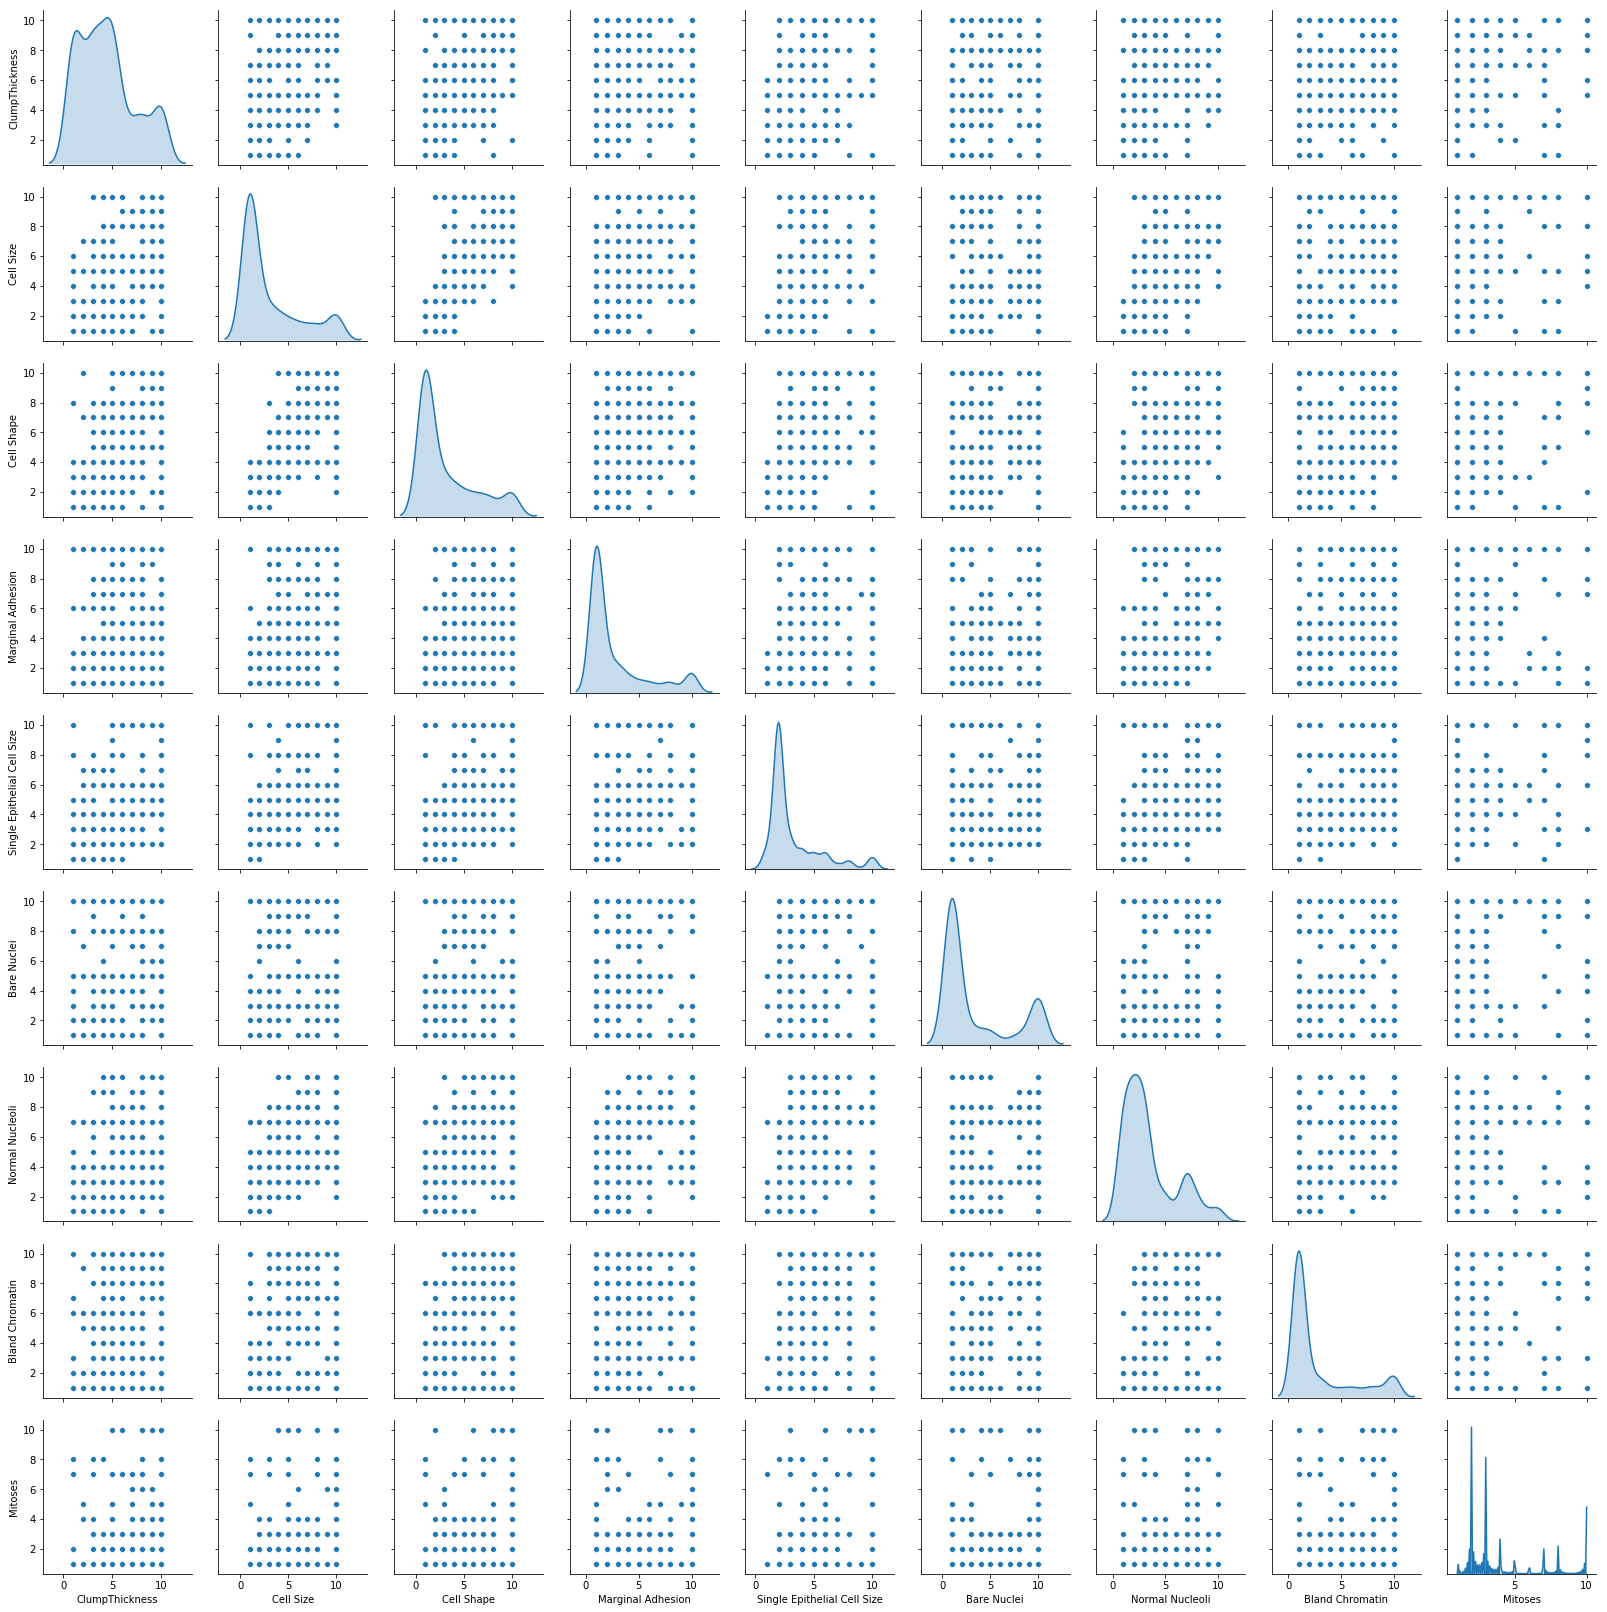

In [8]:
sns.pairplot(cancer, diag_kind='kde')

### Pre-processing: Remove any unwanted columns or outliers, standardize variables
#### Use Z score from scipy.stats

In [9]:
from scipy.stats import zscore
cancer = cancer.apply(zscore)

### Create a covariance matrix for identifying Principal components

In [10]:
# You can also use np.cov(cancerDF.T)
import numpy as np
cov = np.cov(cancer.T)

### Identify eigen values and eigen vector and print them

In [11]:
eigen = np.linalg.eig(cov)

In [12]:
print('The Eigen values are', eigen[0])
print('The Eigen vector are', eigen[1])

The Eigen values are [5.8985519  0.77588307 0.53960155 0.08894898 0.46640555 0.38101776
 0.26233452 0.30405592 0.29609474]
The Eigen vector are [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.6

In [13]:
eigen_values = eigen[0]
eigen_vectors = eigen[1]
eigen_values = np.sort(eigen_values)
eigen_values = eigen_values[::-1]
print(eigen_values)

[5.8985519  0.77588307 0.53960155 0.46640555 0.38101776 0.30405592
 0.29609474 0.26233452 0.08894898]


### Find variance and cumulative variance by each eigen vector
#### Find total of eig_val
#### For each eig_val divide it by total and multiply by 100 the result. Save it in an array called explained variance. Use for loop to iterate through the eig_val array.
#### Do a cumulative sum of all the explained variance.
#### Plot the explained variance.

In [14]:
# To find the total number of components, take value where the variance crosses 90%. Here, it can be either 5, 6 or 7.
eigen_sum = sum(eigen_values)
print(eigen_sum)
explained_variance = []
for i in eigen_values:
    c = i/eigen_sum
    result = c*100
    explained_variance.append(result)

9.012893982808023


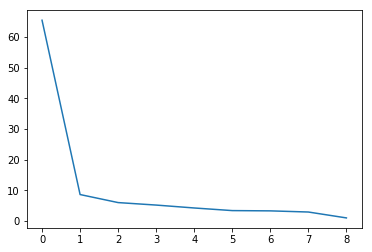

In [15]:
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.show()

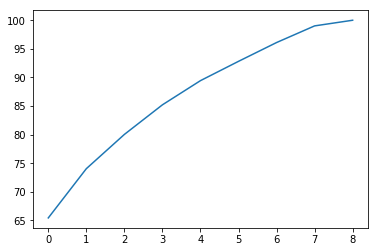

In [16]:
plt.plot(np.cumsum(explained_variance))

### Use PCA from sklearn and find the Principal Components. Transform data to components formed.
#### import PCA from sklearn.decomposition
#### use PCA.components_ to get the components

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(cancer)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
cancer_pca_df = pca.transform(cancer)

In [19]:
pca.components_

array([[ 0.30280515,  0.38119012,  0.37757351,  0.33282286,  0.33639134,
         0.33349748,  0.3459564 ,  0.33584019,  0.22981766],
       [-0.14602888, -0.04956364, -0.08526953, -0.04471887,  0.16403795,
        -0.2477099 , -0.22994199,  0.02502678,  0.90839421],
       [-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
        -0.00367104,  0.19744944,  0.13164974, -0.09459348],
       [-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
        -0.5431767 , -0.00698988,  0.45537199, -0.23968608],
       [-0.07192848,  0.13735749,  0.10469081, -0.03462797,  0.68258246,
         0.1275059 , -0.25519148, -0.63180293, -0.1316273 ]])

#### Convert PCA components to a dataframe. Find out correlation between the components and the dataframe columns

In [20]:
pca_df = pd.DataFrame(pca.components_)
pca_df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.695568,0.727658,-0.293248,0.496785,0.210508,-0.009104,0.061972,0.209014
1,0.695568,1.000000,0.998783,0.036940,0.406987,0.407206,0.586734,0.320567,-0.379050
2,0.727658,0.998783,1.000000,0.026458,0.405253,0.405726,0.569668,0.320703,-0.336800
3,-0.293248,0.036940,0.026458,1.000000,-0.364545,0.798305,0.585844,-0.064980,0.129383
4,0.496785,0.406987,0.405253,-0.364545,1.000000,0.217947,-0.395747,-0.617319,-0.446832
5,0.210508,0.407206,0.405726,0.798305,0.217947,1.000000,0.409689,-0.350165,0.016132
6,-0.009104,0.586734,0.569668,0.585844,-0.395747,0.409689,1.000000,0.654308,-0.243962
7,0.061972,0.320567,0.320703,-0.064980,-0.617319,-0.350165,0.654308,1.000000,0.024005
8,0.209014,-0.379050,-0.336800,0.129383,-0.446832,0.016132,-0.243962,0.024005,1.000000


# Support Vector Machines

#### Read the input file 'diabetes.csv' using Pandas and check it's column names

In [21]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Do correlation analysis using heatmap 

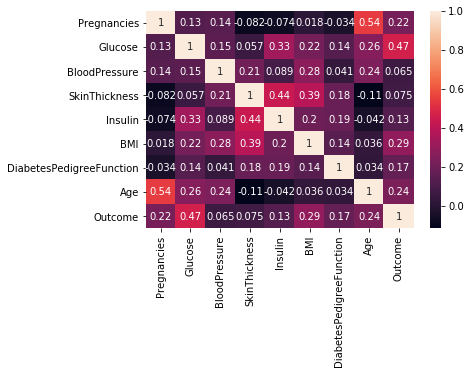

In [22]:
sns.heatmap(diabetes.corr(), annot=True)

#### Split the dataset and Scale the data points using MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']
X = scaler.fit_transform(X)

C:\Users\Balajisri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Train Support Vector Machine Model

In [25]:
from sklearn.svm import SVC
model = SVC(C=.7,kernel='linear', max_iter=500)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7802607076350093
0.7835497835497836


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[134  38]
 [ 12  47]]


## Popularity based Recommendation systems

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

### Read the dataset(jokes.csv).
Check whether you file has header or not in it. If there is no header, then use header=none while reading the dataset

In [27]:
jokes=pd.read_csv('jokes.csv')
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


### Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [28]:
ratings = jokes.head(200).iloc[:,1:]
ratings.shape

(200, 100)

### Change the column indices from 0 to 99

In [29]:
ratings.columns=range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### In the dataset, the null ratings are given as 99, so replace all 99s with 0

In [30]:
ratings.replace(99,0,inplace=True)

### Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [31]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
ratings_diff = scaler.fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Find the mean for each column  in `ratings_diff` i.e, for each joke

In [32]:
ratings_diff_mean = pd.DataFrame(ratings_diff).mean()

### Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [33]:
ratings_diff_mean.sort_values(ascending=False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64

## Recommendation Systems - Content based modeling - OPTIONAL

#### Import movies_metadata.csv

#### Check whether tagline has NA values. If so do a fillna with '' (two single quotes with no spaces)
#### Create a new column Description by appending tagline and overview column
#### Drop rows from the dataframe where the newly created Description column is NA.
#### Drop duplicates from the Title column
#### Check the count of records before and after dropping the Description column
#### Do a reset of the index


In [24]:
movie.dropna(inplace=True, subset=['Description'])
#movie['title'].drop_duplicates(inplace=True)
movie.drop_duplicates(subset=['title'], inplace=True)

NameError: name 'movie' is not defined

#### Use TFIDF vectorizer and create tfidf matrix only for Description column
#### use ngram (1,3), analyzer as word, stop words as english and min_df = 0

#### from sklearn.metrics.pairwise import linear_kernel
#### Pass on the tfidf_matrix created
##### This is used to find the similarities in the data

In [ ]:
#The below two codes help create a series where index would be the title of the movie and column will be the index
titles = movie['title']
indices = pd.Series(movie.index, index=movie['title'])

In [ ]:
def recommend(title):
    idx = indices[title]
    print('idx value is ', idx)
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommend('Jumanji').head(10)